# Predicting House Price (Keras Regression Project)



## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/shmhatre/Desktop/Udemy/Refactored_Py_DS_ML_Bootcamp-master/22-Deep Learning/TensorFlow_FILES/ANNs/kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Exploratory Data Analysis

In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


C:\Users\shmhatre\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


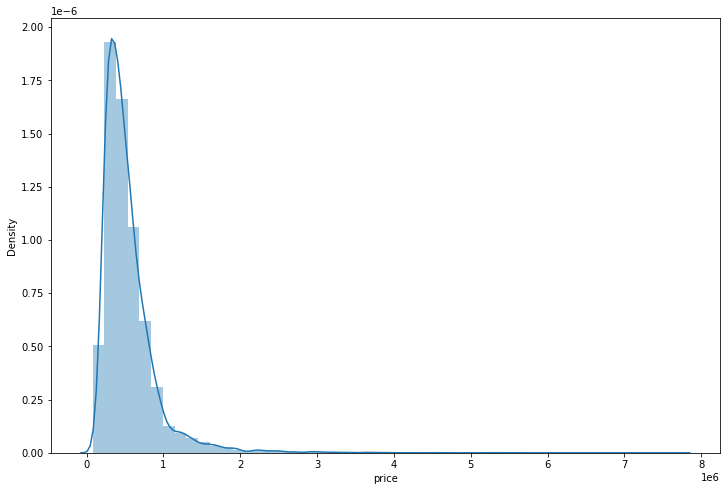

In [12]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

C:\Users\shmhatre\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


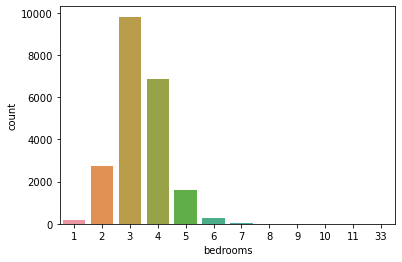

In [13]:
sns.countplot(df['bedrooms'])

In [18]:
df.corr()["price"].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

### Highly correlated feature with lable

### Scatter plot to see the correlation

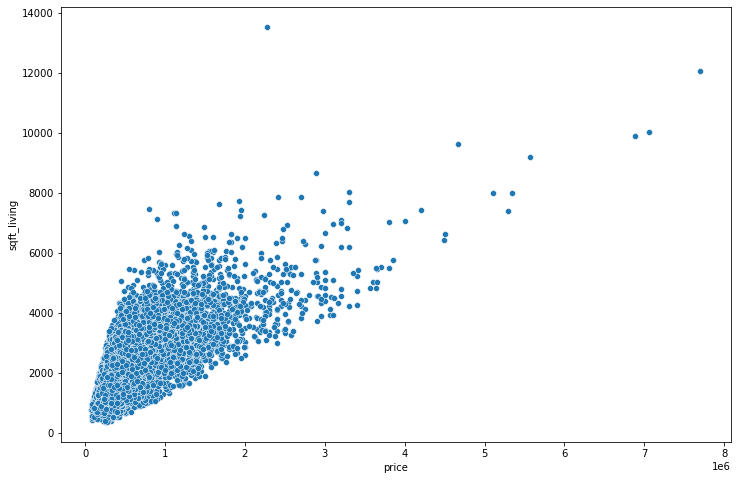

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

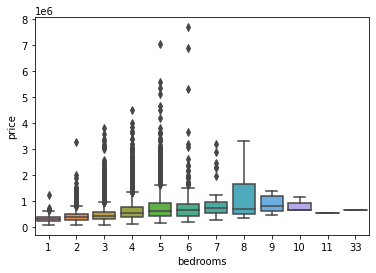

In [11]:
sns.boxplot(x='bedrooms',y='price',data=df)

### Geographical Properties

In [19]:
df.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

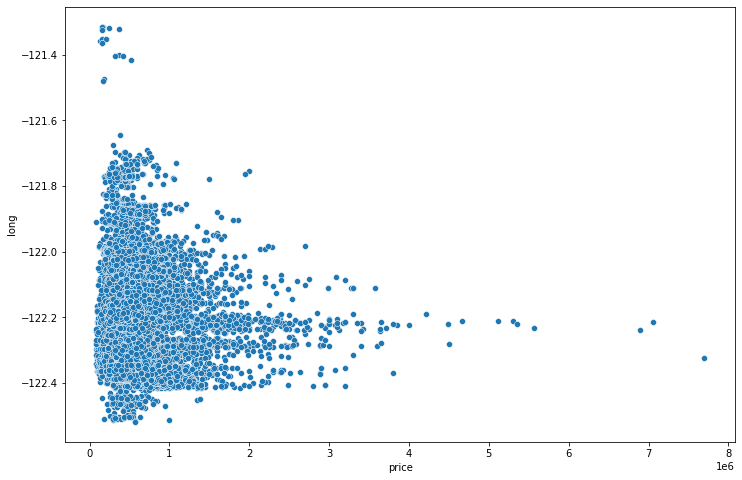

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

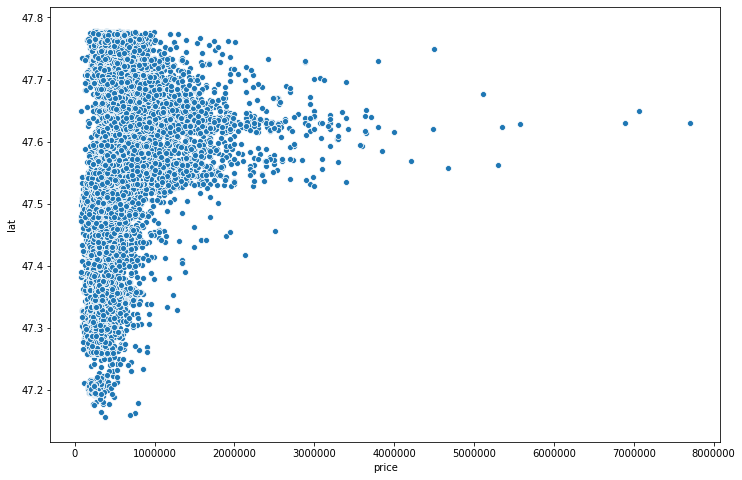

In [10]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

### Scallter plot to see the housing price with lattitude and Longitude

### With hue as price we can see the dark points

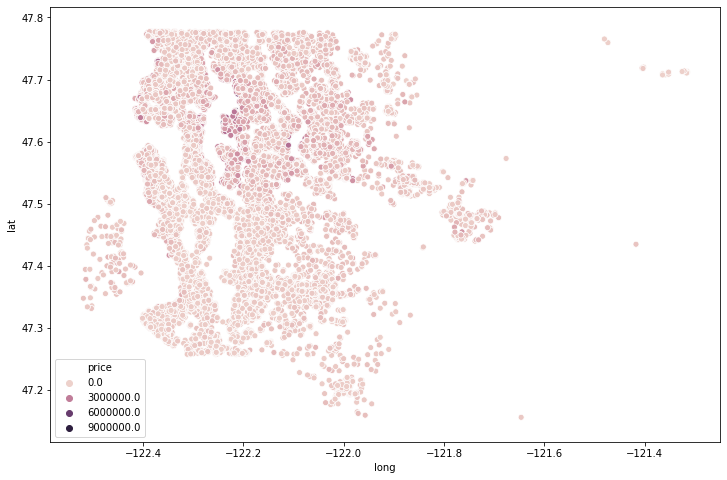

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

### To see the outliers in the housing price

In [22]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


### There are 1% out the houses above 3 miliion price, We select the 99 % of data to plot the graph and drop First 1%

In [23]:
len(df)*(0.01)

215.97

### Grabbing the data points after 215 to get nice color distribution

In [24]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

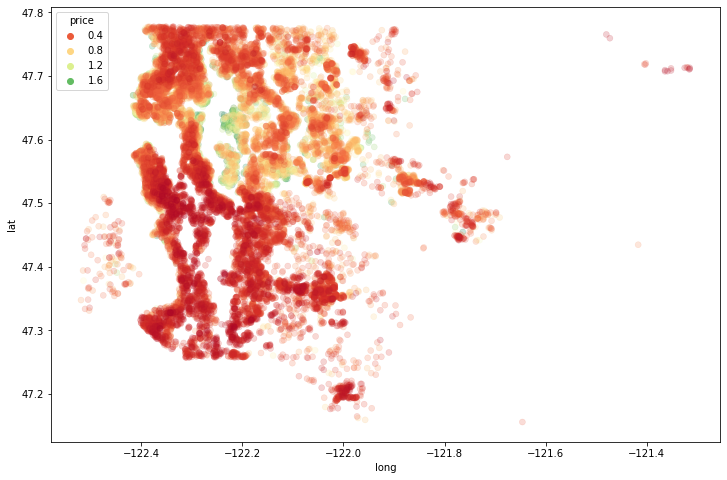

In [25]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

### Other Features

### Check with boxplot with house price with waterfront and without waterfront 

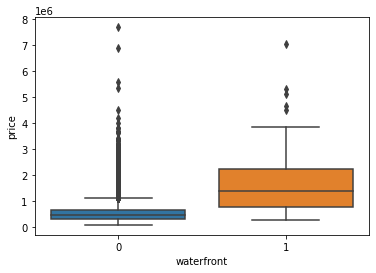

In [26]:
sns.boxplot(x='waterfront',y='price',data=df)

## Working with Feature Data

In [30]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [32]:
df = df.drop('id',axis=1)

In [33]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Feature Engineering from Date

In [34]:
df['date'] = pd.to_datetime(df['date'])

### Extracting month and year from date stamp 

In [35]:
df['month'] = df['date'].apply(lambda date:date.month)

In [36]:
df['year'] = df['date'].apply(lambda date:date.year)

### See the house price when it is sold (Year and Month)

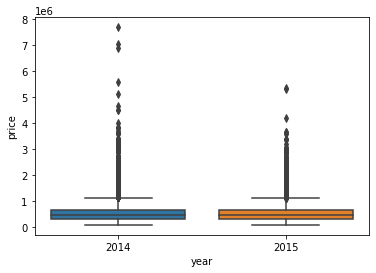

In [37]:
sns.boxplot(x='year',y='price',data=df)

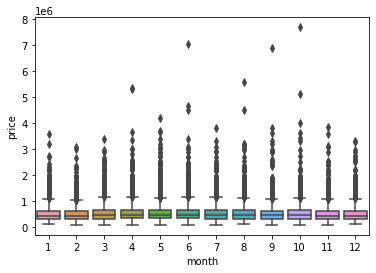

In [38]:
sns.boxplot(x='month',y='price',data=df)

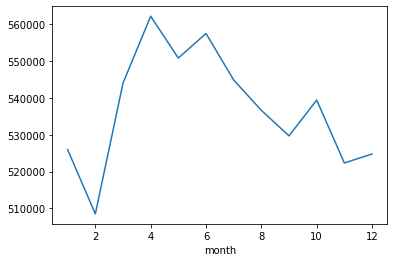

In [39]:
df.groupby('month').mean()['price'].plot()

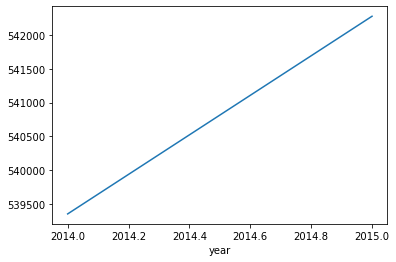

In [40]:
df.groupby('year').mean()['price'].plot()

In [41]:
df = df.drop('date',axis=1)

In [42]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [43]:
# https://i.pinimg.com/originals/4a/ab/31/4aab31ce95d5b8474fd2cc063f334178.jpg
# May be worth considering to remove this or feature engineer categories from it
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [44]:
df = df.drop('zipcode',axis=1)

In [45]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [48]:
# could make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [49]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

## Scaling and Train Test Split

In [60]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
scaler = MinMaxScaler()

In [65]:
X_train= scaler.fit_transform(X_train)

In [66]:
X_test = scaler.transform(X_test)

In [67]:
X_train.shape

(15117, 19)

In [68]:
X_test.shape

(6480, 19)

## Creating a Model

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [70]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [73]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 2s 116us/sample - loss: 430239778213.8064 - val_loss: 418907375792.9877
Epoch 2/400
15117/15117 [==============================] - 0s 15us/sample - loss: 428863967077.8276 - val_loss: 414012216378.1531
Epoch 3/400
15117/15117 [==============================] - 0s 14us/sample - loss: 409056772832.9928 - val_loss: 368873068184.9679
Epoch 4/400
15117/15117 [==============================] - 0s 14us/sample - loss: 316190730101.6784 - val_loss: 225979831880.0593
Epoch 5/400
15117/15117 [==============================] - 0s 14us/sample - loss: 159868370524.0225 - val_loss: 104715051958.6765
Epoch 6/400
15117/15117 [==============================] - 0s 14us/sample - loss: 101099910741.3841 - val_loss: 95155992581.0568
Epoch 7/400
15117/15117 [==============================] - 0s 14us/sample - loss: 97479734345.6315 - val_loss: 93639722214.0840
Epoch 8/400
15117/15117 [==================

15117/15117 [==============================] - 0s 14us/sample - loss: 42193474132.6390 - val_loss: 41434450961.6988
Epoch 65/400
15117/15117 [==============================] - 0s 13us/sample - loss: 42105389798.9538 - val_loss: 41331738285.1951
Epoch 66/400
15117/15117 [==============================] - 0s 13us/sample - loss: 42051866658.4111 - val_loss: 41228992517.0568
Epoch 67/400
15117/15117 [==============================] - 0s 14us/sample - loss: 42023729453.0968 - val_loss: 41246979342.5383
Epoch 68/400
15117/15117 [==============================] - 0s 13us/sample - loss: 41886203307.6319 - val_loss: 41165618749.9457
Epoch 69/400
15117/15117 [==============================] - 0s 13us/sample - loss: 41793330011.0572 - val_loss: 41016966454.9926
Epoch 70/400
15117/15117 [==============================] - 0s 13us/sample - loss: 41683116178.0438 - val_loss: 40932719234.2123
Epoch 71/400
15117/15117 [==============================] - 0s 13us/sample - loss: 41613451274.2962 - val_loss

15117/15117 [==============================] - 0s 13us/sample - loss: 35290624561.8893 - val_loss: 33777678866.9630
Epoch 128/400
15117/15117 [==============================] - 0s 14us/sample - loss: 35121469495.4099 - val_loss: 33697782584.2568
Epoch 129/400
15117/15117 [==============================] - 0s 13us/sample - loss: 35033923159.1453 - val_loss: 33671291603.1210
Epoch 130/400
15117/15117 [==============================] - 0s 14us/sample - loss: 34993374987.2954 - val_loss: 33609772808.2173
Epoch 131/400
15117/15117 [==============================] - 0s 14us/sample - loss: 34982742307.1392 - val_loss: 33502175732.6222
Epoch 132/400
15117/15117 [==============================] - 0s 13us/sample - loss: 34857469140.3596 - val_loss: 33523879784.2963
Epoch 133/400
15117/15117 [==============================] - 0s 14us/sample - loss: 34830603858.8440 - val_loss: 33402842175.2099
Epoch 134/400
15117/15117 [==============================] - 0s 14us/sample - loss: 34740910522.4666 - v

15117/15117 [==============================] - 0s 14us/sample - loss: 33126469833.0473 - val_loss: 31341991349.4123
Epoch 191/400
15117/15117 [==============================] - 0s 13us/sample - loss: 33100192864.7980 - val_loss: 31445441948.1284
Epoch 192/400
15117/15117 [==============================] - 0s 14us/sample - loss: 33315306163.8791 - val_loss: 31368644259.0815
Epoch 193/400
15117/15117 [==============================] - 0s 13us/sample - loss: 33061394424.6165 - val_loss: 31289155932.9185
Epoch 194/400
15117/15117 [==============================] - 0s 13us/sample - loss: 33038751025.0256 - val_loss: 31604625812.5432
Epoch 195/400
15117/15117 [==============================] - 0s 13us/sample - loss: 33042549728.2307 - val_loss: 31237725692.2074
Epoch 196/400
15117/15117 [==============================] - 0s 13us/sample - loss: 33011419663.2072 - val_loss: 31223751090.8839
Epoch 197/400
15117/15117 [==============================] - 0s 13us/sample - loss: 32986526247.9317 - v

15117/15117 [==============================] - 0s 13us/sample - loss: 32515141261.8779 - val_loss: 30537637685.7284
Epoch 254/400
15117/15117 [==============================] - 0s 13us/sample - loss: 32410900829.4619 - val_loss: 30502581280.8691
Epoch 255/400
15117/15117 [==============================] - 0s 14us/sample - loss: 32389392691.3964 - val_loss: 30651350397.7877
Epoch 256/400
15117/15117 [==============================] - 0s 14us/sample - loss: 32394573897.3606 - val_loss: 30475505921.8963
Epoch 257/400
15117/15117 [==============================] - 0s 14us/sample - loss: 32355540864.4488 - val_loss: 30467146466.2914
Epoch 258/400
15117/15117 [==============================] - 0s 13us/sample - loss: 32302558672.0751 - val_loss: 30790139464.0593
Epoch 259/400
15117/15117 [==============================] - 0s 14us/sample - loss: 32453358724.1574 - val_loss: 30499013285.6099
Epoch 260/400
15117/15117 [==============================] - 0s 13us/sample - loss: 32391253379.8018 - v

15117/15117 [==============================] - 0s 14us/sample - loss: 32007438434.2205 - val_loss: 30007371538.3309
Epoch 317/400
15117/15117 [==============================] - 0s 15us/sample - loss: 31972477593.0886 - val_loss: 29970216499.8321
Epoch 318/400
15117/15117 [==============================] - 0s 15us/sample - loss: 31963783476.3448 - val_loss: 30009864015.0123
Epoch 319/400
15117/15117 [==============================] - 0s 14us/sample - loss: 31962181452.6290 - val_loss: 29933429671.5062
Epoch 320/400
15117/15117 [==============================] - 0s 14us/sample - loss: 32060466332.0691 - val_loss: 29933009700.0296
Epoch 321/400
15117/15117 [==============================] - 0s 13us/sample - loss: 32032421372.9179 - val_loss: 29924456655.3284
Epoch 322/400
15117/15117 [==============================] - 0s 13us/sample - loss: 32004731993.2114 - val_loss: 29889447470.7753
Epoch 323/400
15117/15117 [==============================] - 0s 14us/sample - loss: 32005732703.8328 - v

15117/15117 [==============================] - 0s 14us/sample - loss: 31666302333.8408 - val_loss: 29621701280.5531
Epoch 380/400
15117/15117 [==============================] - 0s 15us/sample - loss: 31695890712.1656 - val_loss: 29469558364.2864
Epoch 381/400
15117/15117 [==============================] - 0s 14us/sample - loss: 31657734975.4200 - val_loss: 29451083442.2519
Epoch 382/400
15117/15117 [==============================] - 0s 14us/sample - loss: 31655432162.1951 - val_loss: 29443984275.2790
Epoch 383/400
15117/15117 [==============================] - 0s 14us/sample - loss: 31685665173.4138 - val_loss: 29468674250.2716
Epoch 384/400
15117/15117 [==============================] - 0s 15us/sample - loss: 31651793651.1467 - val_loss: 29515641489.3827
Epoch 385/400
15117/15117 [==============================] - 0s 14us/sample - loss: 31652968303.0400 - val_loss: 29402984331.6938
Epoch 386/400
15117/15117 [==============================] - 0s 14us/sample - loss: 31607452520.7404 - v

In [76]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,4.302398e+11,4.189074e+11
1,4.288640e+11,4.140122e+11
2,4.090568e+11,3.688731e+11
3,3.161907e+11,2.259798e+11
4,1.598684e+11,1.047151e+11
...,...,...
395,3.154758e+10,2.941323e+10
396,3.157656e+10,2.934758e+10
397,3.158018e+10,2.938846e+10
398,3.157229e+10,2.950130e+10


In [74]:
losses = pd.DataFrame(model.history.history)

### Comparing the loss on training set v/s loss on test set (validation set)

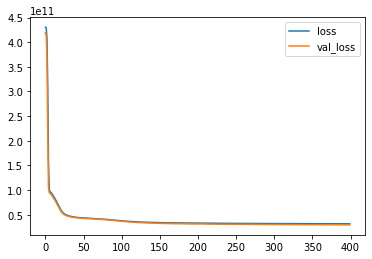

In [78]:
losses.plot()

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [80]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

#### Predicting on Brand New Data

In [81]:
X_test

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.63636364,
        0.        ],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.81818182,
        0.        ],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.90909091,
        0.        ],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 1.        ,
        0.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 0.09090909,
        1.        ],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.45454545,
        0.        ]])

In [82]:
predictions = model.predict(X_test)

### average absolute error on the house price

In [83]:
mean_absolute_error(y_test,predictions)

107175.69136646412

In [85]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [86]:
5.402966e+05

540296.6

In [84]:
np.sqrt(mean_squared_error(y_test,predictions))

171422.88736007255

In [90]:
#help(explained_variance_score) tells the how much variance is explained by your model (need to compare with other model and its value)

In [91]:
explained_variance_score(y_test,predictions)

0.7787504749558122

In [92]:
df['price'].mean()

540296.5735055795

In [93]:
df['price'].median()

450000.0

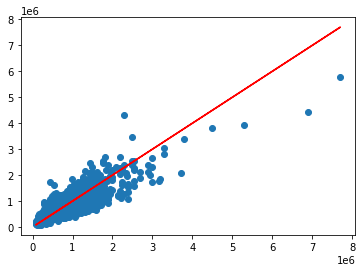

In [94]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [58]:
errors = y_test.values.reshape(6480, 1) - predictions

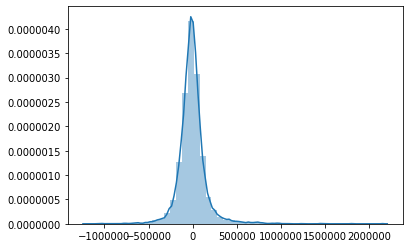

In [59]:
sns.distplot(errors)

-------------
### Predicting on a brand new house

In [97]:
#Taking first house and dropping the price from dataframe
df.drop('price',axis=1).iloc[0]

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
month              10.0000
year             2014.0000
Name: 0, dtype: float64

In [99]:
single_house = df.drop('price',axis=1).iloc[0]

In [100]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [101]:
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.81818182, 0.        ]])

In [102]:
model.predict(single_house)

array([[293240.16]], dtype=float32)

In [103]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64

In [104]:
#Here we are overshooting the price of the house due to the outliers
# next step will be trained the model again on the 99% of the data and dropping the house with over 3 million dollar